**Bibliotecas**

In [1089]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

**Configurações**

In [1090]:
#-------------------- SQL --------------------#

#Conectando o banco de dados no notebook - Python
con = sqlite3.connect("C:\\sqlite\\database.db")

#Criando o cursor para interagir no Python a linguagem SQL
cur = con.cursor()


#-------------------- PYTHON --------------------#
def descricao(df):
    """Essa função auxilia na descrição da base de dados
    
    Paramêtros:

    df = base de dados"""

    df.replace(['NULL'], np.nan, inplace=True)

    return pd.DataFrame({'tipo': df.dtypes,
                         'null': df.isna().sum(),
                         '%null': round(df.isna().sum()/df.shape[0]*100, 2),
                         'unico': df.nunique(),
                         'unico%': round(df.nunique()/df.shape[0]*100, 2),
                         'tamanho': df.shape[0]}, index = df.columns)

## Trabalhando com SQL e Python 

**QUERIES em SQL de validação dos dados**

In [1091]:
#Conhecendo as 5 primeiras linhas da tabela CreditStatus
cur.execute('SELECT * FROM CreditStatus LIMIT 5')
cur.fetchall()

[('698350', 'Ativo'),
 ('817285', 'Ativo'),
 ('962167', 'Ativo'),
 ('1980380', 'Ativo'),
 ('4059697', 'Reprovado')]

In [1092]:
# Tamanho da base de dados 
cur.execute('SELECT COUNT(1) FROM CreditStatus')
print("Resposta:", cur.fetchall())

Resposta: [(34763,)]


In [1094]:
# Valores Nulos
cur.execute('SELECT COUNT(1), COUNT(2) FROM CreditStatus WHERE ClientId IS NULL')
print("Resposta:", cur.fetchall())

Resposta: [(0, 0)]


In [1095]:
# Valores únicos para a chave identificadora
cur.execute('SELECT COUNT (DISTINCT ClientId) FROM CreditStatus')
print("Resposta:", cur.fetchall())

Resposta: [(34763,)]


**QUERIES em SQL e Python para as perguntas**

### 1.1) Qual a taxa de aprovação dos clientes? (i.e., qual o percentual de clientes aprovados)

In [1096]:
cur.execute("SELECT CASE WHEN CreditStatus = 'Reprovado' THEN 'Reprovado' ELSE 'Aprovado'END AS Clientes, COUNT(*) as Total, COUNT(*) * 100 / SUM(COUNT(*)) over () AS Porcentagem FROM CreditStatus GROUP BY Clientes")
print('          '' Clientes    Total   %' '       ' 'Clientes    Total  %')
print('Resposta:', cur.fetchall())

           Clientes    Total   %       Clientes    Total  %
Resposta: [('Aprovado', 19141, 55), ('Reprovado', 15622, 44)]


**Visualizando a taxa de aprovação de crédito**

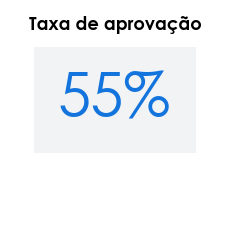

In [1116]:
fig, ax = plt.subplots(figsize=(4,4))
fig.text(x=0.3, y=0.5,s='55%', backgroundcolor='#f2f3f5', size=60, color='#1374dd')

# Cartão
fig.text(x=0.20, y=0.8, s="Taxa de aprovação", size=18, weight="bold")

#Retirando elementos de background do gráfico
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
plt.xticks([])

plt.show()

### 1.2) Quais características dos clientes apresentam maior correlação com a resposta de aprovação do motor de crédito?	

In [1130]:
#Unindo as duas bases via query SQL
df = pd.read_sql_query("SELECT * FROM CreditStatus JOIN Client ON CreditStatus.ClientId = Client.ClientId ", con)

#Visualizando a base de dados
df

,ClientId,CreditStatus,ClientId,Gender,Platform,OSVersion,AddressState,Birthdate,CurrentStatus,RegisterDate,RegisterConclusionDate,RegisterApprovalDate,FirstTransactionDate,PresumedIncome
0,698350,Ativo,698350,Male,Android,7.0,PR,23/10/1990,Aprovado,09/10/2018,09/10/2018,16/10/2018,16/10/2018,1391.24
1,817285,Ativo,817285,Female,Android,None,SC,22/08/1990,Aprovado,10/11/2018,10/11/2018,10/11/2018,22/12/2018,1227.42
2,962167,Ativo,962167,Male,Android,8.0.0,SP,09/01/1984,Aprovado,15/12/2018,15/12/2018,16/12/2018,14/01/2019,4076.58
3,1980380,Ativo,1980380,Female,Android,11.4.1,SC,31/05/1980,Aprovado,16/06/2019,16/06/2019,18/06/2019,20/06/2019,6337.67
4,4059697,Reprovado,4059697,Male,Android,7.1.2,RJ,25/01/1960,Aprovado,07/12/2019,07/12/2019,09/12/2019,11/12/2019,1255.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34758,1098115,Ativo,1098115,Female,Android,7.1.2,PR,25/09/1976,Aprovado,10/01/2019,10/01/2019,11/01/2019,23/01/2019,1039.81
34759,1199557,Ativo,1199557,Male,iPhone+OS,12.1.2,SC,27/01/1967,Aprovado,23/01/2019,23/01/2019,28/01/2019,27/02/2019,2545.25
34760,710324,Ativo,710324,Male,Android,8.0.0,MG,17/03/1986,Aprovado,17/10/2018,17/10/2018,18/10/2018,18/10/2018,5150.00
34761,1631552,Ativo,1631552,Female,Android,8.1.0,MG,23/10/1989,Aprovado,12/04/2019,12/04/2019,13/04/2019,15/05/2019,1284.96


In [1131]:
#Descrição da base de dados
descricao(df)

,tipo,null,%null,unico,unico%,tamanho
ClientId,object,0,0.00,34763,100.00,34763
CreditStatus,object,0,0.00,4,0.01,34763
ClientId,object,0,0.00,34763,100.00,34763
Gender,object,0,0.00,3,0.01,34763
Platform,object,0,0.00,3,0.01,34763
OSVersion,object,3098,8.91,92,0.26,34763
AddressState,object,7,0.02,37,0.11,34763
Birthdate,object,0,0.00,12117,34.86,34763
CurrentStatus,object,0,0.00,2,0.01,34763
RegisterDate,object,0,0.00,1190,3.42,34763


**Tratando a base de dados**

Excluindo colunas duplicadas

In [1132]:
df = df.loc[:,~df.columns.duplicated()]

Criando a variável Status

In [1133]:
# Aprovado são aqueles com CreditStatus igual a Aprovado, Ativo ou Bloqueado
df.loc[df['CreditStatus'] != 'Reprovado', 'Status'] = 'Aprovado' 
df.loc[df['CreditStatus'] == 'Reprovado', 'Status'] = 'Reprovado'  

Traduzindo a variável Gender para o Idioma Português (Brasil)

In [1134]:
df['Gênero'] = df['Gender'].replace(['Male', 'Female', 'Unknown'], ['Masculino', 'Feminino', 'Desconhecido'])

Conhecendo os valores únicos da coluna AddressState

In [1135]:
print(df.AddressState.unique())

['PR' 'SC' 'SP' 'RJ' 'BA' 'RN' 'ES' 'AM' 'GO' 'PA' 'SE' 'MG' 'MT' 'CE'
 'MA' 'DF' 'MS' 'AL' 'PB' 'RS' 'PI' 'PE' 'RO' 'TO' 'AP' 'AC' 'Pe' 'RR'
 None 'pr' 'Sc' 'Se' 'Ceará' 'ms' 'bahia' 'ce' 'Piauí' 'Bahia']


Tratando todas as informações de AddressState para a sua respectiva sigla do Estado

In [1136]:
df['Endereço'] = df['AddressState'].replace(['Pe', 'pr', 'Sc', 'Ceará','ce','ms','Piauí', 'bahia','Bahia','Se' ], ['PE','PR','SC',
                                                'CE', 'CE', 'MS','PI', 'BA','BA','SE' ])

Criando uma variável chamada Idade

In [1137]:
#Transformando Birthdate em data
df['Birthdate'] = pd.to_datetime(df['Birthdate'])

#Diferença da data de hoje e de nascimento
df['Age'] = pd.to_datetime('now') - df['Birthdate']

#Transformando os dias em anos
df['Idade'] = df['Age'] /  np.timedelta64(1, 'Y')

#Arredonando a Idade
df.Idade = df.Idade.round()

**Visualizando as características que influenciam a aprovação do candidato**

Filtro: considerando apenas os clientes que tiveram seu crédito aprovado

In [1138]:
flt = df[df['Status'] == 'Aprovado']

**1) Porcentagem de clientes aprovados por gênero**

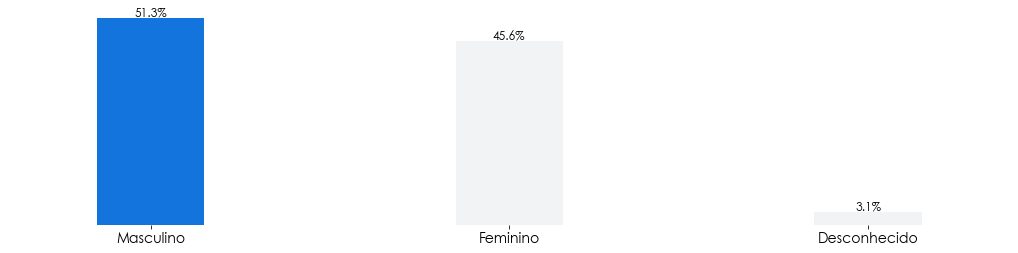

In [1139]:
#Calculando a porcentagem de pessoas por gênero que foi aprovada
genero = (flt.groupby(['Gênero']).size().sort_values(ascending=False) / flt.groupby('Gênero').size().sort_values(ascending=False).sum())*100

#Configurando as cores
colors = ['#1374dd', '#f2f3f5', '#f2f3f5']

plot = genero.plot(kind='bar', color = colors, width = 0.3, figsize=(18, 4), edgecolor= "None", rot=0)

#Retirando elementos de background do gráfico
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])


#Apenas uma casa decimal + símbolo "%"
for p in plot.containers:
    plot.bar_label(p, fmt='%.1f%%', label_type='edge', fontsize =12)

#Detalhes de fonte e tamanho
plt.rcParams["font.family"] = "Century Gothic" 
plt.ylabel('')
plt.tick_params(axis='x', labelsize=14)
plt.xlabel('')

plt.show()

**2) Porcentagem de pessoas aprovadas por Estado**

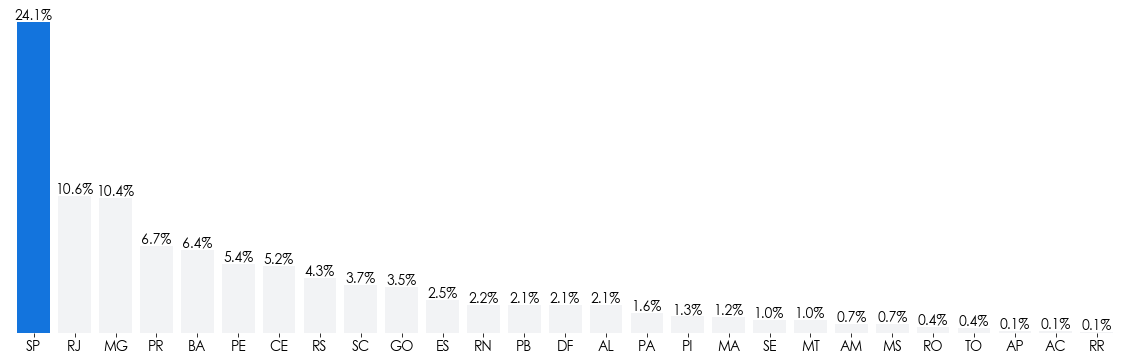

In [1140]:
#Retirando os valores NULOS da columa AddressState
estado = flt[flt['Endereço'] != 'NULL']

#Calculando a porcentagem de pessoas por estado que foi aprovada
estado_plot = (estado.groupby('Endereço').size().sort_values(ascending=False) / estado.groupby('Endereço').size().sort_values(ascending=False).sum())*100

colors = ['#1374dd',  '#f2f3f5', '#f2f3f5', '#f2f3f5', '#f2f3f5', '#f2f3f5','#f2f3f5', 
	 '#f2f3f5', '#f2f3f5', '#f2f3f5','#f2f3f5', '#f2f3f5', '#f2f3f5',  '#f2f3f5','#f2f3f5', 
     '#f2f3f5','#f2f3f5',  '#f2f3f5', '#f2f3f5', '#f2f3f5', '#f2f3f5', '#f2f3f5', '#f2f3f5', 	
     '#f2f3f5',  '#f2f3f5', '#f2f3f5', '#f2f3f5']



plt.figure(figsize=(20,6))

fig =plt.gcf()


fig = estado_plot.plot(kind='bar', color = colors, ylabel = 'Porcentagem', edgecolor= 'None', rot=0, width = 0.8)


#Retirar y_axis e x_axis
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#Apenas uma casa decimal + símbolo "%"
for p in fig.containers:
    fig.bar_label(p, fmt='%.1f%%', label_type='edge', fontsize = 14)

#Detalhes de fonte e tamanho
plt.ylabel('')
plt.tick_params(axis='x', labelsize=14)
plt.xlabel('') 
plt.title('')

plt.savefig('img.png',dpi=100)


**3) Distribuição da idade dos clientes de acordo com o status**

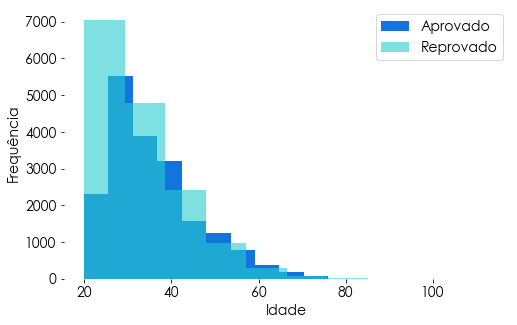

In [1141]:
plt.hist(df[df["Status"]=="Aprovado"]["Idade"].reset_index(drop=True), label = 'Aprovado', color = '#1374dd')
plt.hist(df[df["Status"]=="Reprovado"]["Idade"].reset_index(drop=True), alpha=0.6, label= 'Reprovado', color =  '#28cccd')
plt.gcf().set_size_inches(8, 5)

#Elementos do background
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title('')
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.tick_params(labelsize=14)
plt.legend(fontsize=14)

plt.savefig('idade.png',dpi=100)

**4) Distribuição da renda dos clientes de acordo com o status**

In [1142]:
#Descobrindo o percentil da renda
print('90º percentil:', 'R$', df.PresumedIncome.quantile(0.9))

90º percentil: R$ 2703.11


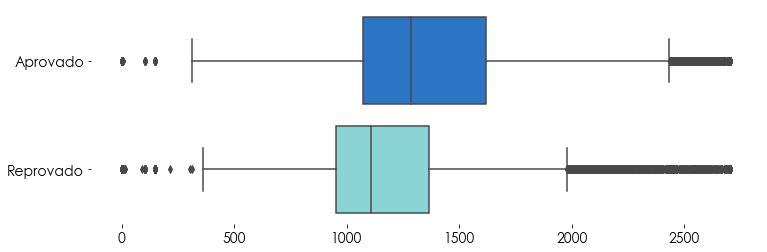

In [1143]:
colors = ['#1374dd', '#7ee0e1']

renda = sns.boxplot(x = 'PresumedIncome', data = df.query('PresumedIncome <= 2703.11'), orient = 'h', 
                    y = 'Status', palette=colors)

#Configurações 
renda.figure.set_size_inches(12, 4)
renda.set_title('')
renda.set_xlabel('', fontsize = 14)
renda.set_ylabel('', fontsize = 14)
plt.tick_params(labelsize=14)


#Elementos do background
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.savefig('renda.png',dpi=100)

### 2.1) Qual o Over 30 mob3 para a Neon em uma visão geral? Qual o Over 30 mob3 para cada uma das safras (mensais)?	

In [1144]:
#2.1) Extraindo a base de dados FirstInvoiceDate
df1 = pd.read_sql_query("SELECT * FROM FirstInvoiceDate ", con)

#Visualizando a base de dados
df1

,Date,ClientId,FirstInvoiceDate,InvoiceId,InvoiceDueDate,OverdueDays,InvoiceStatus,InvoiceValue
0,05/01/2020,5503,05/05/2019,459297,05/01/2020,0,REGULAR,451.60
1,05/10/2019,11313,05/07/2019,1209407,05/10/2019,0,REGULAR,2.09
2,25/09/2019,26648,25/04/2019,1142564,25/09/2019,0,REGULAR,123.03
3,11/07/2019,13079,11/06/2019,604139,11/07/2019,0,REGULAR,296.80
4,05/06/2019,33023,05/03/2019,481369,05/06/2019,0,REGULAR,403.58
...,...,...,...,...,...,...,...,...
114554,15/10/2019,2764303,15/10/2019,1426046,15/10/2019,0,REGULAR,1.00
114555,05/01/2020,2772485,05/12/2019,1959258,05/01/2020,0,REGULAR,81.96
114556,15/10/2019,2779604,15/10/2019,1447580,15/10/2019,0,REGULAR,1200.00
114557,15/12/2019,3741133,15/12/2019,2057659,15/12/2019,0,REGULAR,170.71


In [1145]:
#Descrição da base de dados
descricao(df1)

,tipo,null,%null,unico,unico%,tamanho
Date,object,0,0.00,78,0.07,114559
ClientId,object,0,0.00,22116,19.31,114559
FirstInvoiceDate,object,0,0.00,72,0.06,114559
InvoiceId,object,0,0.00,114559,100.00,114559
InvoiceDueDate,object,0,0.00,78,0.07,114559
OverdueDays,object,0,0.00,29,0.03,114559
InvoiceStatus,object,0,0.00,2,0.00,114559
InvoiceValue,float64,0,0.00,65288,56.99,114559


**Análise de inadimplência: *Over 30 mob 3*** 

Tratando os dados

In [1147]:
#Transformando FirstInvoiceDate em data
df1['FirstInvoiceDate'] = pd.to_datetime(df1['FirstInvoiceDate'], format = "%d/%m/%Y")

#Transformando FirstInvoiceDate em data
df1['InvoiceDueDate'] = pd.to_datetime(df1['InvoiceDueDate'], format = "%d/%m/%Y")

#Nome Mês
df1['Mês Safra'] = df1['FirstInvoiceDate'].dt.strftime('%b')

#Ano
df1['Ano Safra'] = df1['FirstInvoiceDate'].dt.year

#Mês
df1['N_Mês'] = df1['FirstInvoiceDate'].dt.month

In [1148]:
#Diferença de meses entre a 1ª primeira fatura e a atual
df1['DifDate'] = ((df1['InvoiceDueDate'] - df1['FirstInvoiceDate'])/np.timedelta64(1, 'M'))

#Arrendondando o valor
df1['DifDate'] = df1['DifDate'].round()

In [1149]:
#Convertendo OverdueDays para tipo númerico
df1["OverdueDays"] = pd.to_numeric(df1["OverdueDays"])

#Condição para identificar o Over 30 mob 3
df1['Over'] = np.where(((df1.DifDate == 2) & ((df1.OverdueDays >= 30))), '1', '0')

Resultado: **Taxa de *Over 30 mob 3* geral**

In [1150]:
df1.groupby('Over').size()/ df1.groupby('Over').size().sum()*100

Over
0   96.80
1    3.20
dtype: float64

Resultado: **Taxa de *Over 30 mob 3* por mês**

In [1152]:
df1.loc[df1['Mês Safra'] == 'Aug', 'Mês Safra'] = 'Ago' 
df1.loc[df1['Mês Safra'] == 'May', 'Mês Safra'] = 'Mai' 
df1.loc[df1['Mês Safra'] == 'Oct', 'Mês Safra'] = 'Out' 
df1.loc[df1['Mês Safra'] == 'Sep', 'Mês Safra'] = 'Set' 

In [1153]:
#Quantidade de clientes com ou não over 30 mob 3 geral
over = df1.groupby(['Ano Safra', 'N_Mês','Mês Safra', 'Over'])['Over'].count()

#Porcentagem de pessoas em relação ao total
over_1 = over.groupby(level=1).apply(lambda x:100 * x / float(x.sum())).reset_index(name = '%')

#Taxa de over 30 mob 3 geral
over1 = over_1.query("Over == '1'")

In [1154]:
meses = ['Jan', 'Feb', 'Mar', 'Apr','Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

mapping = dict(zip(meses,range(len(meses))))

over1['Order_mes'] = over1['Mês Safra'].map(mapping)

C:\Users\Sophia\AppData\Local\Temp/ipykernel_8352/3099350329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over1['Order_mes'] = over1['Mês Safra'].map(mapping)


**1) Taxa de Over 30 Mob3 por safras**

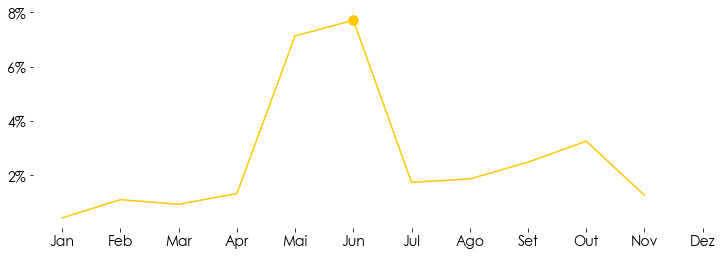

In [1155]:
#Gráfico
tx = over1.plot(kind='line', x='Order_mes', y= '%', figsize=(12, 5), color = '#ffc801', legend=False)

tx.figure.set_size_inches(12, 4)

#Configurações 
tx.set_title('')
tx.set_xlabel('')
tx.set_label('')

#Ponto máximo
tx.scatter(x=5, y=7.703516, s=90, color='#ffc801')

#Retirando elementos de background
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tick_params(labelsize=14)
plt.xticks(range(len(meses)),meses)

#Y com %
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.savefig('over_mes.png',dpi=100)

### 2.2) Utilizando as informações fornecidas neste documento, avalie quais são as variáveis mais relevantes para a taxa de inadimplência do cartão de crédito Neon.


In [1156]:
#Unindo as duas bases Clientes e FirstInvoiceDate
df2 = pd.merge(left = df1 , right = df, on = ['ClientId'], how = "left")

#Visualizando a base de dados
df2

,Date,ClientId,FirstInvoiceDate,InvoiceId,InvoiceDueDate,OverdueDays,InvoiceStatus,InvoiceValue,Mês Safra,Ano Safra,...,RegisterDate,RegisterConclusionDate,RegisterApprovalDate,FirstTransactionDate,PresumedIncome,Status,Gênero,Endereço,Age,Idade
0,05/01/2020,5503,2019-05-05,459297,2020-01-05,0,REGULAR,451.60,Mai,2019,...,25/09/2016,None,16/10/2016,18/10/2016,1616.97,Aprovado,Masculino,AM,10913 days 01:20:36.473456,30.00
1,05/10/2019,11313,2019-07-05,1209407,2019-10-05,0,REGULAR,2.09,Jul,2019,...,08/11/2016,None,14/11/2016,26/06/2019,1314.37,Aprovado,Masculino,GO,8997 days 01:20:36.473456,25.00
2,25/09/2019,26648,2019-04-25,1142564,2019-09-25,0,REGULAR,123.03,Apr,2019,...,27/12/2016,None,17/01/2017,20/01/2017,796.76,Aprovado,Masculino,GO,9816 days 01:20:36.473456,27.00
3,11/07/2019,13079,2019-06-11,604139,2019-07-11,0,REGULAR,296.80,Jun,2019,...,14/10/2016,None,21/11/2016,09/11/2018,1267.12,Aprovado,Masculino,MG,9119 days 01:20:36.473456,25.00
4,05/06/2019,33023,2019-03-05,481369,2019-06-05,0,REGULAR,403.58,Mar,2019,...,27/01/2017,None,21/02/2017,23/02/2017,1150.00,Aprovado,Masculino,MG,12317 days 01:20:36.473456,34.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114554,15/10/2019,2764303,2019-10-15,1426046,2019-10-15,0,REGULAR,1.00,Out,2019,...,18/09/2019,18/09/2019,21/09/2019,30/09/2019,1254.94,Aprovado,Feminino,SC,22905 days 01:20:36.473456,63.00
114555,05/01/2020,2772485,2019-12-05,1959258,2020-01-05,0,REGULAR,81.96,Dec,2019,...,21/09/2019,21/09/2019,21/09/2019,20/11/2019,1013.05,Aprovado,Masculino,CE,8155 days 01:20:36.473456,22.00
114556,15/10/2019,2779604,2019-10-15,1447580,2019-10-15,0,REGULAR,1200.00,Out,2019,...,22/09/2019,22/09/2019,22/09/2019,08/10/2019,1511.09,Reprovado,Feminino,PR,11154 days 01:20:36.473456,31.00
114557,15/12/2019,3741133,2019-12-15,2057659,2019-12-15,0,REGULAR,170.71,Dec,2019,...,18/11/2019,18/11/2019,20/11/2019,08/12/2019,1188.20,Aprovado,Feminino,MG,9746 days 01:20:36.473456,27.00


In [1157]:
#Descrição da base de dados
descricao(df2)

,tipo,null,%null,unico,unico%,tamanho
Date,object,0,0.00,78,0.07,114559
ClientId,object,0,0.00,22116,19.31,114559
FirstInvoiceDate,datetime64[ns],0,0.00,72,0.06,114559
InvoiceId,object,0,0.00,114559,100.00,114559
InvoiceDueDate,datetime64[ns],0,0.00,78,0.07,114559
OverdueDays,int64,0,0.00,29,0.03,114559
InvoiceStatus,object,0,0.00,2,0.00,114559
InvoiceValue,float64,0,0.00,65288,56.99,114559
Mês Safra,object,0,0.00,12,0.01,114559
Ano Safra,int64,0,0.00,1,0.00,114559


Criando uma variável para avaliar se a fatura é maior que a renda pressumida

In [1162]:
df2['Fatura_Renda'] = np.where((df2.InvoiceValue > df2.PresumedIncome), 'Valor da Fatura > Renda', 'Valor da Fatura <= Renda')

#Mudando a descrição da variável
df2.loc[df2['InvoiceStatus'] == 'INADIMPLENTE', 'InvoiceStatus'] = 'Inadimplente' 
df2.loc[df2['InvoiceStatus'] == 'REGULAR', 'InvoiceStatus'] = 'Regular'  

In [1163]:
#Contando a quantidade de fatura maior ou menor que a renda em relação a inadimplência
fatura = df2.groupby(['Fatura_Renda', 'InvoiceStatus'])['Fatura_Renda'].count()

fatura = fatura.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name = '%')

fatura


,Fatura_Renda,InvoiceStatus,%
0,Valor da Fatura <= Renda,Inadimplente,9.30
1,Valor da Fatura <= Renda,Regular,90.70
2,Valor da Fatura > Renda,Inadimplente,35.79
3,Valor da Fatura > Renda,Regular,64.21


**1) Inadimplência e valor da fatura**

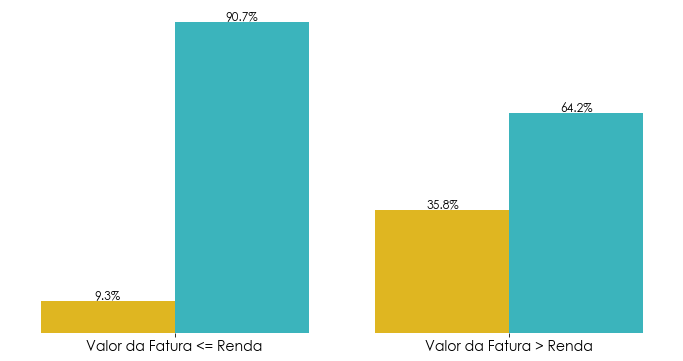

In [1164]:
colors = ['#ffc801', '#26c7d1']
plot = sns.barplot(x = "Fatura_Renda", y = "%", hue = "InvoiceStatus", 
                    palette=colors ,data = fatura)

#Configurações 
plot.figure.set_size_inches(12,6)
plot.set_title('')
plot.set_xlabel('')
plot.set_ylabel('')
plt.legend(fontsize = 14)
plt.tick_params(labelsize=14)
plot.legend().set_visible(False)

#Retirando elementos de background do gráfico
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#Apenas uma casa decimal + símbolo "%"
for p in plot.containers:
    plot.bar_label(p, fmt='%.1f%%', label_type='edge', fontsize =12)

plt.savefig('fatura_.png',dpi=100)


Criando variável para faixas de idade

In [1165]:
#Labels das faixas
labels = ['[20-40)', '[40-60)', '60+']

#Divisão da idade
bins = [20, 40, 60, 76]

#Criando a variável FaixaIdade
df2['FaixaIdade'] = pd.cut(df2['Idade'], bins = bins, labels = labels, right=False)

In [1166]:
#Contando a quantidade de pessoas de acordo com a inadimplência e a faixa de idade
faixa_idade = df2.groupby(['FaixaIdade', 'InvoiceStatus'])['FaixaIdade'].count()

#Porcentagem desses clientes
faixa_idade = faixa_idade.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name = '%')

faixa_idade


,FaixaIdade,InvoiceStatus,%
0,[20-40),Inadimplente,10.30
1,[20-40),Regular,89.70
2,[40-60),Inadimplente,9.75
3,[40-60),Regular,90.25
4,60+,Inadimplente,10.19
5,60+,Regular,89.81


**2) Inadimplência e faixa de idade**

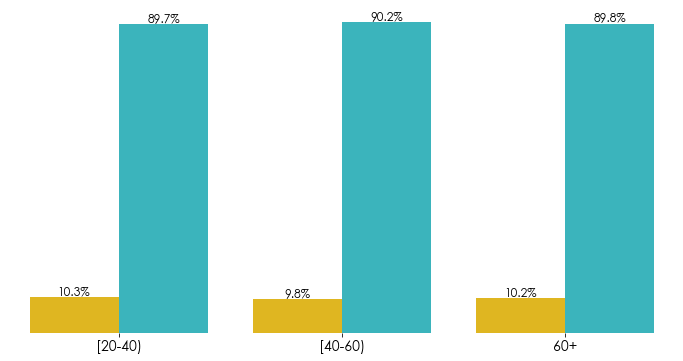

In [1167]:
colors = ['#ffc801', '#26c7d1']
plot = sns.barplot(x = "FaixaIdade", y = "%", hue = "InvoiceStatus", 
                    palette=colors ,data = faixa_idade )

#Configurações 
plot.figure.set_size_inches(12,6)
plot.set_title('')
plot.set_xlabel('')
plot.set_ylabel('')
plot.legend().set_visible(False)
plt.tick_params(labelsize=14)


#Retirando elementos de background do gráfico
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#Apenas uma casa decimal + símbolo "%"
for p in plot.containers:
    plot.bar_label(p, fmt='%.1f%%', label_type='edge', fontsize =12)

plt.savefig('faixa_idade.png',dpi=100)


Relacionando gênero e inadimplência

In [1168]:
#Quantidade de clientes inadimplentes e regulares por gênero
genero_inad = df2.groupby(['Gênero', 'InvoiceStatus'])['Gênero'].count()

#Porcentagem
genero_inad = genero_inad.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name = '%')

genero_inad

,Gênero,InvoiceStatus,%
0,Desconhecido,Inadimplente,9.09
1,Desconhecido,Regular,90.91
2,Feminino,Inadimplente,10.53
3,Feminino,Regular,89.47
4,Masculino,Inadimplente,9.89
5,Masculino,Regular,90.11


**3) Relação entre gênero e inadimplência**

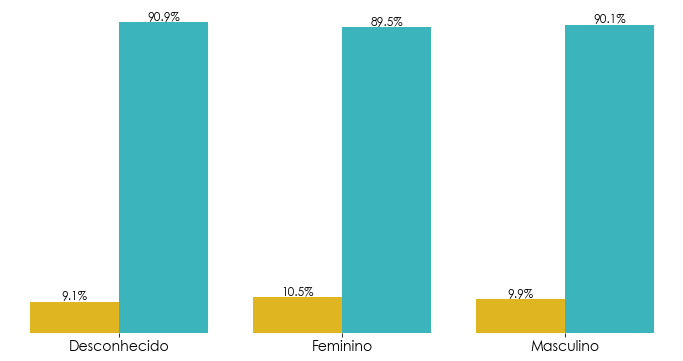

In [1169]:
colors = ['#ffc801', '#26c7d1']

plot = sns.barplot(x = "Gênero", y = "%", hue = "InvoiceStatus", 
                    palette=colors ,data = genero_inad)

#Configurações 
plot.figure.set_size_inches(12,6)
plot.set_title('')
plot.set_xlabel('')
plot.set_ylabel('')
plot.legend().set_visible(False)
plt.tick_params(labelsize=14)


#Retirando elementos de background do gráfico
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#Apenas uma casa decimal + símbolo "%"
for p in plot.containers:
    plot.bar_label(p, fmt='%.1f%%', label_type='edge', fontsize =12)

plt.savefig('genero_inad.png',dpi=100)


Relação entre quantidade de faturas com status inadimplente e gênero

In [1170]:
#Contanto a recorrência de fatura inadimplente por idade
idade_inad = df2.groupby(['ClientId', 'Gênero'])['InvoiceStatus'].count().reset_index(name = 'n')

**4) Recorrência de faturas inadimplentes e gênero**

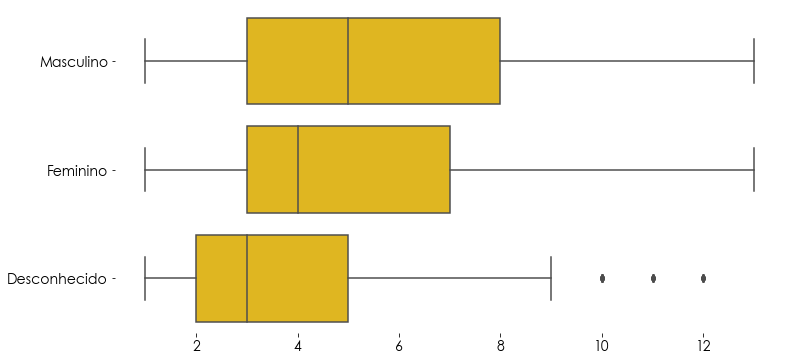

In [1171]:
plot = sns.boxplot(x='n', y ='Gênero', data= idade_inad, color = '#ffc801')

#Configurações 
plot.figure.set_size_inches(12, 6)
plot.set_title('')
plot.set_xlabel('')
plot.set_ylabel('')
plt.tick_params(labelsize=14)


#Elementos do background
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.savefig('genero_boxplot.png',dpi=100)


Relação entre idade e inadimplência

Criando a variável faixa de renda

In [1172]:
labels = ['[0 - 1000)', '[1000 - 2000)', '[2000 - 3000)','3000+']
bins = [0, 1000, 2000, 3000, 1098161]
df2['FaixaRenda'] = pd.cut(df2['PresumedIncome'], bins = bins, labels = labels, right=False)

In [1173]:
rendafaixa = df2.groupby(['FaixaRenda', 'InvoiceStatus'])['FaixaRenda'].count()

rendafaixa = rendafaixa.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name = '%')

rendafaixa

,FaixaRenda,InvoiceStatus,%
0,[0 - 1000),Inadimplente,16.74
1,[0 - 1000),Regular,83.26
2,[1000 - 2000),Inadimplente,10.33
3,[1000 - 2000),Regular,89.67
4,[2000 - 3000),Inadimplente,5.70
5,[2000 - 3000),Regular,94.30
6,3000+,Inadimplente,5.56
7,3000+,Regular,94.44


**5) Inadimplência e Faixa de Renda**

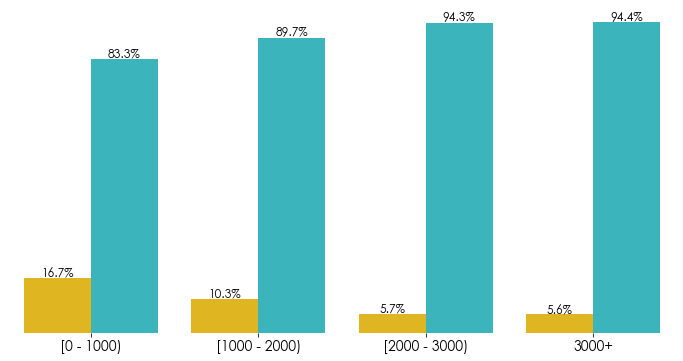

In [1174]:
colors = ['#ffc801', '#26c7d1']
plot = sns.barplot(x = "FaixaRenda", y = "%", hue = "InvoiceStatus", 
                    palette=colors ,data = rendafaixa)

#Configurações 
plot .figure.set_size_inches(12,6)
plot .set_title('')
plot .set_xlabel('')
plot .set_ylabel('')
plot.legend().set_visible(False)
plt.tick_params(labelsize=14)


#Retirando elementos de background do gráfico
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#Apenas uma casa decimal + símbolo "%"
for p in plot.containers:
    plot.bar_label(p, fmt='%.1f%%', label_type='edge', fontsize =12)

plt.savefig('renda_inad.png',dpi=100)

### 3 - O time de Cartão de Crédito levantou a preocupação com um aparente aumento da inadimplência da Neon no segundo semestre de 2019. A preocupação é de que os clientes das safras a partir de julho/2019 possuem uma tendência maior à inadimplência

### 3.1) A percepção do time de Cartão de Crédito está correta? Por qual motivo o time de Cartão de Crédito pode ter chego a esta percepção?


**Taxa de inadimplência por safra**

In [1175]:
taxa_safra = df2.groupby(['Ano Safra', 'N_Mês', 'Mês Safra', 'InvoiceStatus'])['InvoiceStatus'].count()

#Porcentagem de pessoas em relação ao total
taxa_safra =  taxa_safra.groupby(level=1).apply(lambda x:100 * x / float(x.sum())).reset_index(name = '% Inadimplência')

taxa_safra = taxa_safra.query("InvoiceStatus == 'Inadimplente'")

pd.options.display.float_format = '{:.2f}'.format

taxa_safra[['Ano Safra', 'Mês Safra', '% Inadimplência']]

,Ano Safra,Mês Safra,% Inadimplência
0,2019,Jan,6.72
2,2019,Feb,7.79
4,2019,Mar,7.47
6,2019,Apr,7.65
8,2019,Mai,18.59
10,2019,Jun,19.18
12,2019,Jul,6.90
14,2019,Ago,6.16
16,2019,Set,6.26
18,2019,Out,6.03


**Taxa de inadimplência calculada pela data de fatura**

In [1176]:
#Nome do mês de fatura
df2['Mês Fatura'] = df2['InvoiceDueDate'].dt.strftime('%b')

#Número do mês de fatura
df2['NMêsFatura'] = df2['InvoiceDueDate'].dt.month

#Número do ano da fatura
df2['Ano Fatura'] = df2['InvoiceDueDate'].dt.year


In [1177]:
df2.loc[df2['Mês Fatura'] == 'Aug', 'Mês Fatura'] = 'Ago' 
df2.loc[df2['Mês Fatura'] == 'May', 'Mês Fatura'] = 'Mai' 
df2.loc[df2['Mês Fatura'] == 'Oct', 'Mês Fatura'] = 'Out' 
df2.loc[df2['Mês Fatura'] == 'Sep', 'Mês Fatura'] = 'Set' 

In [1178]:
taxa_fatura = df2.groupby(['Ano Fatura','NMêsFatura','Mês Fatura', 'InvoiceStatus'])['InvoiceStatus'].count()

#Porcentagem de pessoas em relação ao total
taxa_fatura = taxa_fatura.groupby(level=2).apply(lambda x:100 * x / float(x.sum())).reset_index(name = '% Inadimplência')

taxa_fatura = taxa_fatura.query("InvoiceStatus == 'Inadimplente'")

taxa_fatura[['Ano Fatura','Mês Fatura', '% Inadimplência']]


,Ano Fatura,Mês Fatura,% Inadimplência
1,2019,Feb,2.29
3,2019,Mar,5.93
5,2019,Apr,5.48
7,2019,Mai,5.01
9,2019,Jun,10.94
11,2019,Jul,20.83
13,2019,Ago,17.84
15,2019,Set,10.12
17,2019,Out,8.24
19,2019,Nov,7.87


O que podemos perceber é que o time de cartão de crédito se confundiu. A taxa de inadimplência apresenta um ponto alto em julho/2019 e valores maiores em Agosto e Setempro quando comparados a média, apenas se você considerar que a safra corresponde a data da fatura, não a data da primeira fatura não nula. 

### 3.2: Quais são possíveis causas do aumento da inadimplência observada em meses específicos?


Hipótise 1: o número de clientes com registro aprovados foi maior nos meses com maior número de inadimplência? 

In [1179]:
#Transformando RegisterApprovalDate do cadastro em data
df2['RegisterApprovalDate'] = pd.to_datetime(df2['RegisterApprovalDate'], format = "%d/%m/%Y")

In [1180]:
#Número do mês da data do registro de aprovação
df2['Mês Registro'] = df2['RegisterApprovalDate'].dt.strftime('%b')

#Número do mês da data do registro de aprovação
df2['NMêsRegistro'] = df2['RegisterApprovalDate'].dt.month

#Ano do mês de registro aprovado
df2['Ano Registro'] = df2['RegisterApprovalDate'].dt.year

In [1181]:
df2.loc[df2['Mês Registro'] == 'Aug', 'Mês Registro'] = 'Ago' 
df2.loc[df2['Mês Registro'] == 'May', 'Mês Registro'] = 'Mai' 
df2.loc[df2['Mês Registro'] == 'Oct', 'Mês Registro'] = 'Out' 
df2.loc[df2['Mês Registro'] == 'Sep', 'Mês Registro'] = 'Set' 

In [1182]:
#Filtrando apenas os clientes que foram aprovados em 2019
flt2 = df2[df2['Ano Registro'] == 2019]

In [1183]:
#Calculando o número de pessoas com registros aprovados por mês em 2019
flt2.groupby(['Mês Registro']).ClientId.agg(Clientes = 'nunique').sort_values(['Clientes'],  ascending=False)


,Clientes
Mês Registro,
Ago,1985
Apr,1952
Set,1889
Mai,1800
Mar,1732
Jul,1585
Jan,1467
Jun,1467
Out,1388


Não foi possível observar um maior número de clientes com crédito aprovado nos meses com maior inadimplência seja ela calculada via 
data de safra ou mês da fatura.

Hipótese 2: clientes que se registraram em 2019 e que tiveram seu registro anterior a junho/2019 tiveram taxas maiores de inadimplência?

In [1184]:
df2['Reg_Jan_Maio'] = np.where((df2['NMêsRegistro'] < 6) & (df2['Ano Registro'] == 2019), 'Registro em 2019 até maio' , 'Registro em outro período')

In [1186]:
registro = df2.groupby(['N_Mês', 'Mês Safra', 'Reg_Jan_Maio', 'InvoiceStatus'])['Reg_Jan_Maio'].count().reset_index(name = 'count')


In [1187]:
registro.set_index(['N_Mês', 'Mês Safra', 'Reg_Jan_Maio'], inplace=True)

In [1188]:
df_percent = 100*(registro/ registro.groupby(level=[0,1,2]).sum())
df_percent['InvoiceStatus'] = registro['InvoiceStatus']
df_percent = df_percent.reset_index()
df_percent = df_percent.rename(columns={'Reg_Jan_Maio': 'Registro', 'count' : '%'})  

In [1189]:
df_percent = df_percent.query("InvoiceStatus == 'Inadimplente'" )

In [1190]:
pd.pivot_table(df_percent, values='%', index=['Registro'],
                    columns=['N_Mês', 'Mês Safra'])

N_Mês,1,2,3,4,5,6,7,8,9,10,11,12
Mês Safra,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dec
Registro,,,,,,,,,,,,
Registro em 2019 até maio,8.71,9.81,8.67,8.37,19.82,19.26,5.76,4.02,4.65,4.36,4.99,1.10
Registro em outro período,6.65,6.41,5.43,5.48,15.71,18.94,7.80,6.62,6.49,6.24,4.23,0.94


Clientes registrados em 2019 até o mês de maio realmente tiveram um compartamento de inadimplência maior nas primeiras safras, chegando a um ponto máxim em maio, quando comparados aos outros clientes. Mas a partir de Julho reduzem substancialmente as faturas inadimplentes para esses clientes.
Adicionalmente, percebe-se taxas maiores de inadimplências para os dois grupos até a safra de jun/2019, o que pode ser explicado provalmente por um contexto macroeconômico. 